In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# XOR Data
x_seeds = np.array([(0,0), (1,0), (0,1), (1,1)], dtype = np.float64)
y_seeds = np.array([0,1,1,0])

In [3]:
N = 1000
idxs = np.random.randint(0,4,N)

In [4]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [5]:
X += np.random.normal(scale = 0.25, size = X.shape)

In [6]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens

        self.W1 = np.random.normal(size=(num_hiddens, num_input_features))
        self.b1 = np.random.normal(size=num_hiddens)
        self.W2 = np.random.normal(size=num_hiddens)
        self.b2 = np.random.normal(size=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2, a2)


In [7]:
model = shallow_neural_network(2,3)

In [8]:
# 기존 train 모델 (Vector 계산 없음)
def train1(X, Y, model, lr=0.1):
  """
  신경망 모델을 훈련하는 함수

  Args:
    X: 입력 데이터 (numpy 배열)
    Y: 레이블 데이터 (numpy 배열)
    model: 훈련할 신경망 모델 객체
    lr: 학습률 (기본값: 0.1)

  Returns:
    훈련 후의 손실 값
  """

  # 모델의 가중치 및 편향과 동일한 모양의 0으로 채워진 배열 초기화
  dW1 = np.zeros_like(model.W1)
  db1 = np.zeros_like(model.b1)
  dW2 = np.zeros_like(model.W2)
  db2 = np.zeros_like(model.b2)

  m = len(X)  # 데이터 샘플 수
  cost = 0.0  # 손실 초기화

  # 각 데이터 샘플에 대해 반복
  for x, y in zip(X, Y):
    # 모델 예측
    a2, (z1, a1, z2, _) = model.predict(x)

    # 손실 계산 (이진 교차 엔트로피)
    if y == 1:
      cost -= np.log(a2)
    else:
      cost -= np.log(1 - a2)

    # 출력층 오차 계산
    diff = a2 - y

    # 출력층 가중치 및 편향 업데이트
    db2 += diff

    for i in range(model.num_hiddens):
      dW2[i] += a1[i] * diff

    # 은닉층 오차 계산 및 가중치 및 편향 업데이트
    for i in range(model.num_hiddens):
      db1[i] += (1 - a1[i]**2) * model.W2[i] * diff
    for i in range(model.num_hiddens):
      for j in range(model.num_input_features):
        dW1[i, j] += x[j] * (1 - a1[i]**2) * model.W2[i] * diff

  # 평균 손실 계산
  cost /= m

  # 가중치 및 편향 업데이트
  model.W1 -= lr * dW1 / m
  model.b1 -= lr * db1 / m
  model.W2 -= lr * dW2 / m
  model.b2 -= lr * db2 / m

  return cost

In [9]:
# 벡터 계산으로 변경된 train 모델
def train2(X, Y, model, lr=0.1):
    """
    신경망 모델을 훈련하는 함수 (벡터 계산 적용)

    Args:
        X: 입력 데이터 (numpy 배열)
        Y: 레이블 데이터 (numpy 배열)
        model: 훈련할 신경망 모델 객체
        lr: 학습률 (기본값: 0.1)

    Returns:
        훈련 후의 손실 값
    """

    # 모델 예측
    Z1 = np.dot(X, model.W1.T) + model.b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, model.W2) + model.b2
    A2 = model.sigmoid(Z2)

    # 손실 계산 (이진 교차 엔트로피)
    cost = -np.mean(Y * np.log(A2.flatten()) + (1 - Y) * np.log(1 - A2.flatten()))

    # 출력층 오차 계산
    diff = A2.flatten() - Y

    # 출력층 가중치 및 편향 업데이트 (벡터 연산)
    db2 = np.sum(diff)
    dW2 = np.dot(A1.T, diff)

    # 은닉층 오차 계산 및 가중치 및 편향 업데이트 (벡터 연산)
    delta1 = (1 - A1**2) * (diff.reshape(-1, 1) @ model.W2.T.reshape(1, -1)) # 수정된 부분
    db1 = np.sum(delta1, axis=0)
    dW1 = np.dot(delta1.T, X)

    # 가중치 및 편향 업데이트
    model.W1 -= lr * dW1 / len(X)
    model.b1 -= lr * db1 / len(X)
    model.W2 -= lr * dW2 / len(X)
    model.b2 -= lr * db2 / len(X)

    return cost

In [10]:
for epoch in range(100):
  cost = train2(X,Y, model, 1.0)
  if epoch % 10 == 0:
    print(epoch, cost)

0 1.367043445665047
10 0.6679738325043929
20 0.6092383432850097
30 0.5315309951175573
40 0.4464677741830104
50 0.3820837974468933
60 0.3410457590117444
70 0.31561674493002395
80 0.29952787717410784
90 0.2890155383695235


In [11]:
model.predict((0,0))[0].item()

0.06848097090270096

In [12]:
model.predict((0,1))[0].item()

0.9011783965454454

In [13]:
model.predict((1,0))[0].item()

0.881318422217531

In [14]:
model.predict((1,1))[0].item()

0.06708234304255642

In [15]:
idxs_1 = np.where(Y==1)
idxs_0 = np.where(Y==0)

In [16]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [17]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

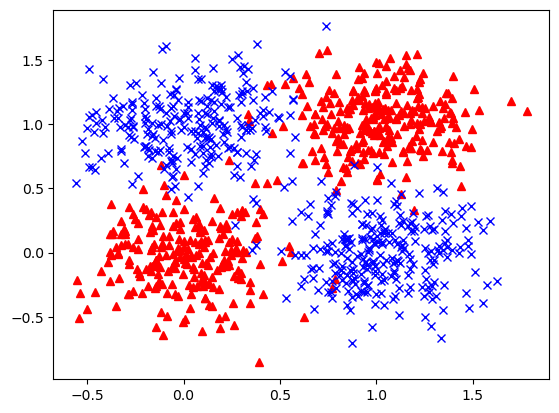

In [18]:
# plot
plt.plot(X_0[:,0], X_0[:,1],"r^")
plt.plot(X_1[:,0], X_1[:,1],"bx")
plt.show()